# Neural Networks

In [48]:
import json
import random
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_recall_fscore_support

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [13]:
# Generate data for the spiral
n_points = 1000
t = np.linspace(0, 2*np.pi, n_points)
r = t**0.5  # Non-linear radial component

# Create 3 arms
arms = 3
X = []
y = []
colors = []

for i in range(arms):
    angle = t + (2*np.pi*i / arms)
    X.extend(r * np.cos(angle))
    y.extend(r * np.sin(angle))
    colors.extend([f'c{i+1}'] * n_points)

# Add some noise
noise_level = 0.1
X = np.array(x) + np.random.normal(0, noise_level, len(x))
y = np.array(y) + np.random.normal(0, noise_level, len(y))

# Create the DataFrame
df = pd.DataFrame({
    'X1': X,
    'X2': y,
    'color': colors
})

# Display the first few rows of the DataFrame
print(df.head().to_string(index=True))
print()
# Data shapes
X = df[["X1", "X2"]].values
y = df["color"].values
print ("X: ", np.shape(X))
print ("y: ", np.shape(y))

         X1        X2 color
0 -0.017466 -0.078376    c1
1 -0.005902  0.116902    c1
2  0.319456  0.079699    c1
3  0.476082  0.000464    c1
4  0.042259  0.018424    c1

X:  (3000, 2)
y:  (3000,)


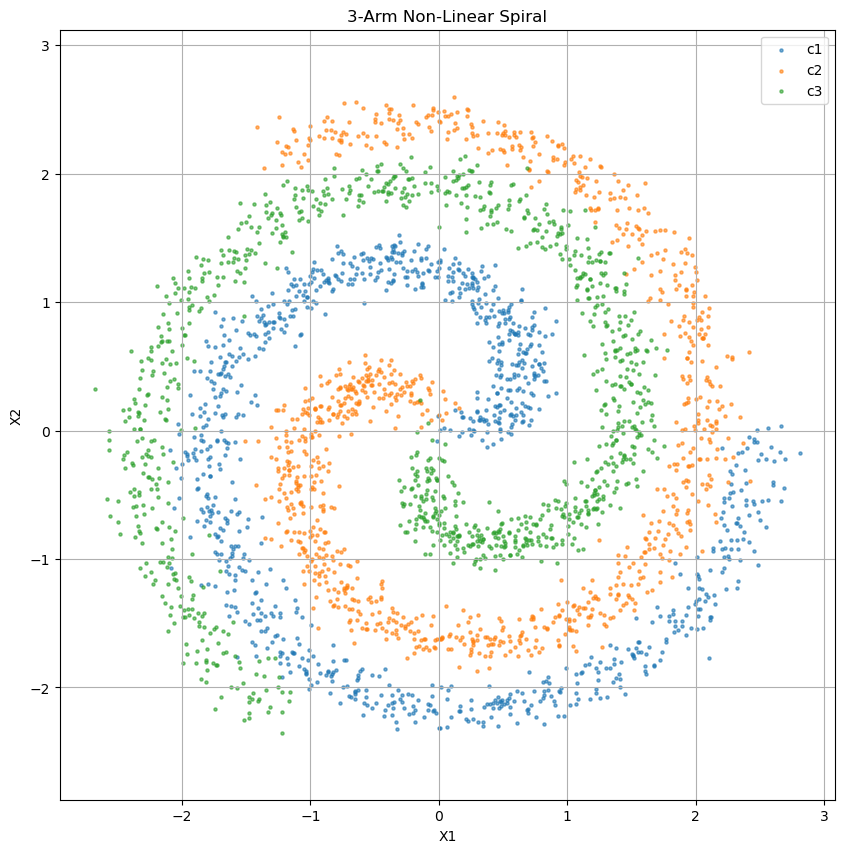

In [14]:
# Plot the spiral using the DataFrame
plt.figure(figsize=(10, 10))
for color in ['c1', 'c2', 'c3']:
    subset = df[df['color'] == color]
    plt.scatter(subset['X1'], subset['X2'], alpha=0.6, s=5, label=color)
plt.title("3-Arm Non-Linear Spiral")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Split data

In [15]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [16]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [17]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (2100, 2), y_train: (2100,)
X_val: (450, 2), y_val: (450,)
X_test: (450, 2), y_test: (450,)
Sample point: [0.62650727 0.81797734] → c1


# Label encoding

In [19]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print(f'Classes: {classes}')

Classes: ['c1', 'c2', 'c3']


In [21]:
print(f"y_train[0]: {y_train[0]}")
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print(f"y_train[0]: {y_train[0]}")

y_train[0]: c1
y_train[0]: 0


In [22]:
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"counts: {counts}\nweights: {class_weights}")

counts: [700 700 700]
weights: {0: 0.0014285714285714286, 1: 0.0014285714285714286, 2: 0.0014285714285714286}


## Standardize data

In [24]:
X_scaler = StandardScaler().fit(X_train)

In [26]:
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

X_test[0]: mean: -0.0, std: 0.8
X_test[1]: mean: -0.0, std: 0.8


## Initialize weights

In [28]:
INPUT_DIM = X_train.shape[1] # X is 2-dimensional
HIDDEN_DIM = 100
NUM_CLASSES = len(classes) # 3 classes

In [29]:

W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))
print(f'W1: {W1.shape}')
print(f'b1: {b1.shape}')

W1: (2, 100)
b1: (1, 100)


## Model

In [30]:
z1 = np.dot(X_train, W1) + b1
print(f"z1: {z1.shape}")

z1: (2100, 100)


In [31]:
# Apply activation function
a1 = np.maximum(0, z1) #ReLU

In [32]:
# Second layer's weights
W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))
print(f"W2: {W2.shape}")
print(f"b2: {b2.shape}")

W2: (100, 3)
b2: (1, 3)


In [33]:
logits = np.dot(a1, W2) + b2
print(f"logits: {logits.shape}")
print(f"sample: {logits[0]}")

logits: (2100, 3)
sample: [-1.93395702e-04 -1.00788637e-03  9.70698735e-05]


In [34]:
# Normalize via softmax to obtain class probabilities
exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
print(f"y_hat: {y_hat.shape}")
print(f"sample: {y_hat[0]}")

y_hat: (2100, 3)
sample: [0.33339153 0.33312009 0.33348838]


## Loss

In [35]:
correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
loss = -np.sum(correct_class_logprobs) / len(y_train)
print(f"loss: {loss:.2f}")

loss: -1.10


## Gradients

In [36]:
# dj/dW2
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW2 = np.dot(a1.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [37]:
# dj/dW1
dhidden = np.dot(dscores, W2.T)
dhidden[a1 <= 0] = 0
dW1 = np.dot(X_train.T, dhidden)
db1 = np.sum(dhidden, axis=0, keepdims=True)

## Update weights

In [42]:
LEARNING_RATE = -1e0

W1 += -LEARNING_RATE * dW1
b1 += -LEARNING_RATE * db1
W2 += -LEARNING_RATE * dW2
b2 += -LEARNING_RATE * db2

# Training

In [44]:
# Initialize random weights
W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))
W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))

# Training loop
for epoch_num in range(1000):

    # First layer forward pass [NX2] · [2X100] = [NX100]
    z1 = np.dot(X_train, W1) + b1

    # Apply activation function
    a1 = np.maximum(0, z1) # ReLU

    # z2 = logits = [NX100] · [100X3] = [NX3]
    logits = np.dot(a1, W2) + b2

    # Normalization via softmax to obtain class probabilities
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Loss
    correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
    loss = np.sum(correct_class_logprobs) / len(y_train)

    # show progress
    if epoch_num%100 == 0:
        # Accuracy
        y_pred = np.argmax(logits, axis=1)
        accuracy =  np.mean(np.equal(y_train, y_pred))
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

    # dJ/dW2
    dscores = y_hat
    dscores[range(len(y_hat)), y_train] -= 1
    dscores /= len(y_train)
    dW2 = np.dot(a1.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # dJ/dW1
    dhidden = np.dot(dscores, W2.T)
    dhidden[a1 <= 0] = 0 # ReLu backprop
    dW1 = np.dot(X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Update weights
    W1 += -1e0 * dW1
    b1 += -1e0 * db1
    W2 += -1e0 * dW2
    b2 += -1e0 * db2

Epoch: 0, loss: 1.099, accuracy: 0.334
Epoch: 100, loss: 0.962, accuracy: 0.407
Epoch: 200, loss: 0.843, accuracy: 0.539
Epoch: 300, loss: 0.653, accuracy: 0.749
Epoch: 400, loss: 0.590, accuracy: 0.716
Epoch: 500, loss: 0.507, accuracy: 0.759
Epoch: 600, loss: 0.432, accuracy: 0.804
Epoch: 700, loss: 0.355, accuracy: 0.856
Epoch: 800, loss: 0.238, accuracy: 0.926
Epoch: 900, loss: 0.182, accuracy: 0.951


In [45]:
class MLP():
    def predict(self, x):
        z1 = np.dot(x, W1) + b1
        a1 = np.maximum(0, z1)
        logits = np.dot(a1, W2) + b2
        exp_logits = np.exp(logits)
        y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return y_hat

In [46]:
model = MLP()
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

In [51]:
def get_metrics(y_true, y_pred, classes):
    """Per-class performance metrics."""
    performance = {"overall": {}, "class": {}}
    # overall
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))
    # per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision" : metrics[0][i],
            "recall" : metrics[1][i],
            "f1" : metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }
    return performance

In [52]:
# Performance
performance = get_metrics(y_true=y_test, y_pred=y_pred, classes=classes)
print(json.dumps(performance, indent=2))

{
  "overall": {
    "precision": 0.9381821347865491,
    "recall": 0.9377777777777778,
    "f1": 0.9377058567135871,
    "num_samples": 450.0
  },
  "class": {
    "c1": {
      "precision": 0.9473684210526315,
      "recall": 0.96,
      "f1": 0.9536423841059603,
      "num_samples": 150.0
    },
    "c2": {
      "precision": 0.9161290322580645,
      "recall": 0.9466666666666667,
      "f1": 0.9311475409836065,
      "num_samples": 150.0
    },
    "c3": {
      "precision": 0.951048951048951,
      "recall": 0.9066666666666666,
      "f1": 0.9283276450511946,
      "num_samples": 150.0
    }
  }
}


In [53]:
def plot_multiclass_decision_boundary_numpy(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.
    Credit: https://cs231n.github.io/neural-networks-case-study/

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format="png")

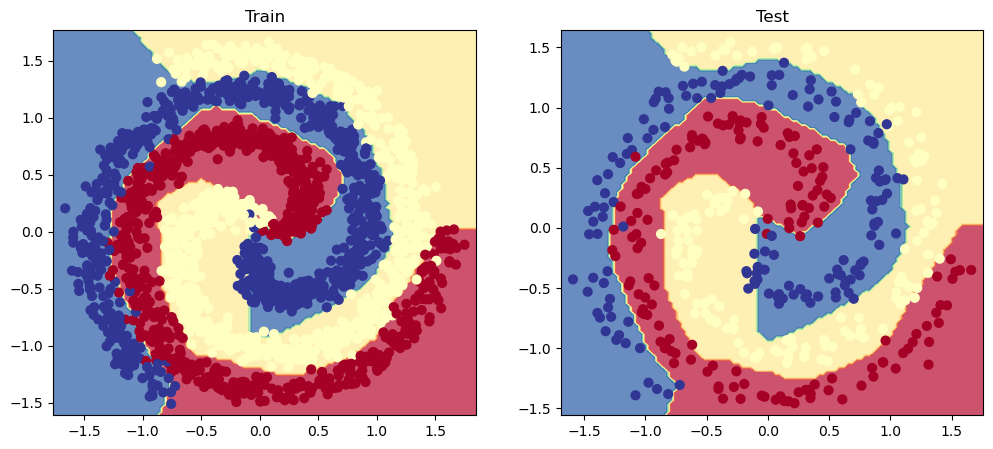

In [54]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary_numpy(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary_numpy(model=model, X=X_test, y=y_test)
plt.show()